In [3]:
# Dependencies
# ----------------------------------
# Imports the method used for connecting to DBs
from sqlalchemy import create_engine

# Imports the methods needed to abstract classes into tables
from sqlalchemy.ext.declarative import declarative_base

# Allow us to declare column types
from sqlalchemy import Column, Integer, String, Float, ForeignKey, Table 

from sqlalchemy.orm import relationship

# Sets an object to utilize the default declarative base in SQL Alchemy
Base = declarative_base()

# Pandas
import pandas as pd

In [4]:
# Set up the engine and connection...
# Get the password securely
password=input('please input password for database connection')
connectstring='postgresql+psycopg2://postgres:'+ password + '@localhost:5432/sql-challenge'

engine = create_engine(connectstring) 
conn = engine.connect()  

In [5]:
# Create a "Metadata" Layer That Abstracts our SQL Database
# ----------------------------------
# Use this to clear out the db
# ----------------------------------
Base.metadata.drop_all(engine)

# Create (if not already in existence) the tables associated with our classes.
Base.metadata.create_all(engine)

# Create a Session Object to Connect to DB
# ----------------------------------
# Session is a temporary binding to our DB
from sqlalchemy.orm import Session
session = Session(bind=engine)

In [6]:
# verify capability read / Load pandas from all tables in the sql-challenge database 
department_pd = pd.read_sql("SELECT * FROM department", conn)
department_employee_pd = pd.read_sql("SELECT * FROM department_employee", conn)
department_manager_pd =  pd.read_sql("SELECT * FROM department_manager", conn)
title_pd =  pd.read_sql("SELECT * FROM title", conn)
salary_pd =  pd.read_sql("SELECT * FROM salary", conn)
employee_pd =  pd.read_sql("SELECT * FROM employee", conn)
# check that all tables completely loaded
print(department_pd.count())
print(department_employee_pd.count())
print(department_manager_pd.count())
print(title_pd.count())
print(salary_pd.count())
print(employee_pd.count())


department_number    9
department_name      9
dtype: int64
employee_number      331603
department_number    331603
dtype: int64
department_number    24
employee_number      24
dtype: int64
title_id    7
title       7
dtype: int64
employee_number    300024
salary             300024
dtype: int64
employee_number      300024
employee_title_id    300024
birth_date           300024
first_name           300024
last_name            300024
gender               300024
hire_date            300024
dtype: int64


In [23]:

salaries_pd =  pd.read_sql("Select Salary from Salary", conn)
salaries_pd.count()

salary    300024
dtype: int64

In [12]:
# Create bins in which to place values based upon Salary range
bins = [0, 1000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 1000000]

# Create labels for these bins
group_labels = ["<10K", "10k-19k", "20k-29k", "30k-39k", "40k-49k", "50k-59k","60k-69k", "70k-79k", "80k-89k", "90k-99k", ">100,000"]


In [14]:
pd.cut(salaries_pd["salary"], bins, labels=group_labels).head()

0    60k-69k
1    60k-69k
2    40k-49k
3    40k-49k
4    70k-79k
Name: salary, dtype: category
Categories (11, object): ['<10K' < '10k-19k' < '20k-29k' < '30k-39k' ... '70k-79k' < '80k-89k' < '90k-99k' < '>100,000']

In [17]:

salaries_pd["Salary_Group"] = pd.cut(salaries_pd["salary"], bins, labels=group_labels).head()
salaries_pd.head()

,salary,Salary_Group
0,60117,60k-69k
1,65828,60k-69k
2,40006,40k-49k
3,40054,40k-49k
4,78228,70k-79k


In [20]:
import matplotlib.pyplot as plt

Bar Chart of Salaries using Pandas:



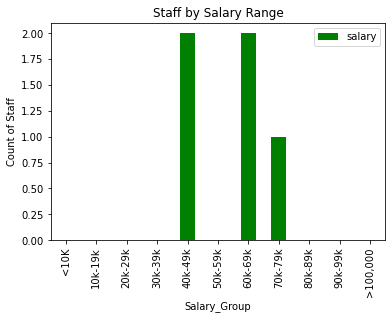

In [21]:
salaries_pd.groupby("Salary_Group").count().plot(kind='bar',color='g', align="center",title="Staff by Salary Range")
plt.ylabel("Count of Staff")
print(f"Bar Chart of Salaries using Pandas:\n")
plt.show()

In [24]:
salaries_pd.count()

salary    300024
dtype: int64